## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [5]:
# url = "https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset"
# tips = sns.load_dataset("tips")
tips = pd.read_csv('tips.csv')

### 1. Make a list of categorical and numerical columns in the data.

In [8]:
categorical_cols = tips.select_dtypes(include=['object']).columns.tolist()
numerical_cols = tips.select_dtypes(include=['float64', 'int64']).columns.tolist()

### 2. Compute the average bill amount for each day.

In [9]:
average_bill_per_day = tips.groupby('day')['total_bill'].mean()

### 3. Which gender is more generous in giving tips?

In [10]:
average_tip_by_gender = tips.groupby('sex')['tip'].mean()

### 4. According to the data, were there more customers for dinner or lunch?

In [11]:
meal_count = tips['time'].value_counts()

### 5. Based on the statistical summary, comment on the variable 'tip'

In [12]:
tip_summary = tips['tip'].describe()

### 6. Find the busiest day in terms of the orders?

In [13]:
busiest_day = tips['day'].value_counts().idxmax()

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

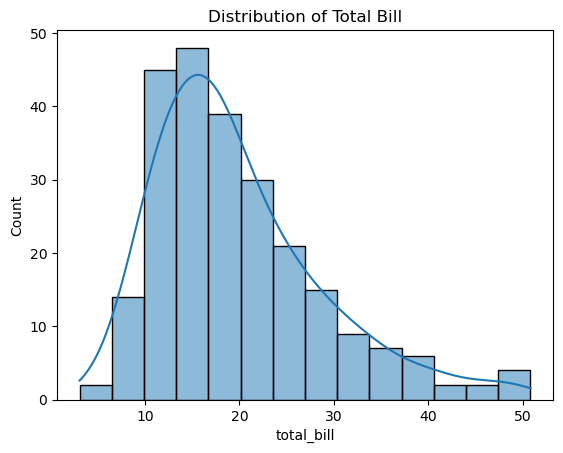

In [14]:
sns.histplot(tips['total_bill'], kde=True)
plt.title("Distribution of Total Bill")
plt.show()
skewness = tips['total_bill'].skew()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

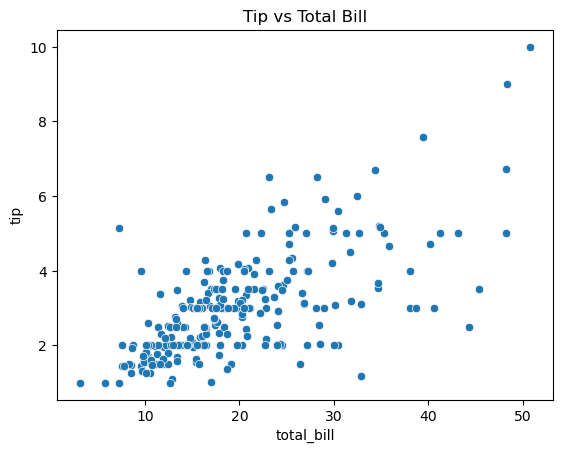

In [15]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Tip vs Total Bill")
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

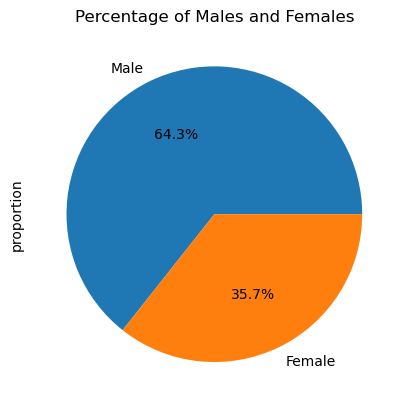

In [16]:
gender_percentage = tips['sex'].value_counts(normalize=True) * 100
gender_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Males and Females")
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

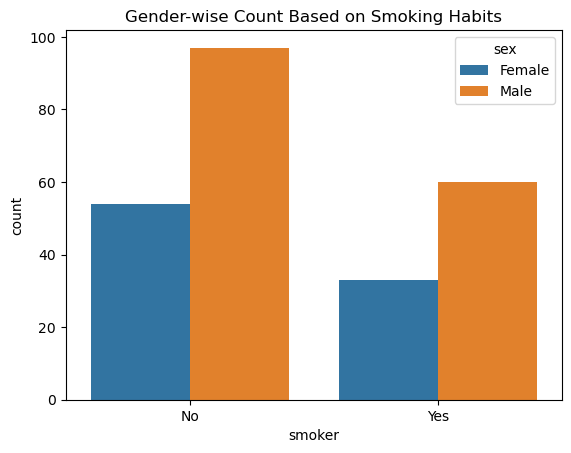

In [17]:
sns.countplot(x='smoker', hue='sex', data=tips)
plt.title("Gender-wise Count Based on Smoking Habits")
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

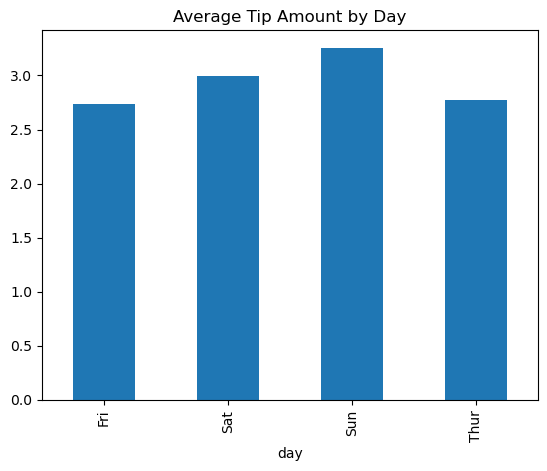

In [18]:
average_tip_by_day = tips.groupby('day')['tip'].mean()
average_tip_by_day.plot(kind='bar')
plt.title("Average Tip Amount by Day")
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

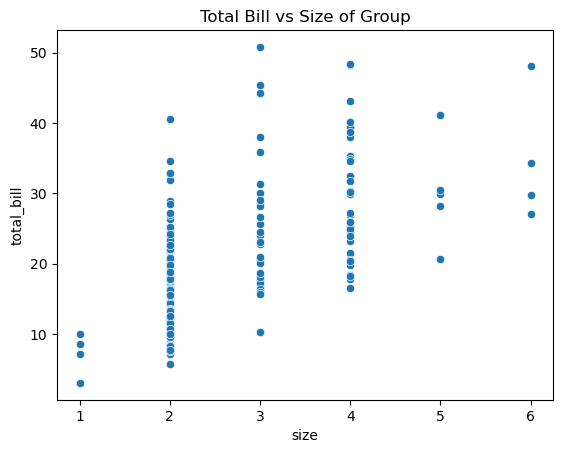

In [19]:
sns.scatterplot(x='size', y='total_bill', data=tips)
plt.title("Total Bill vs Size of Group")
plt.show()


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

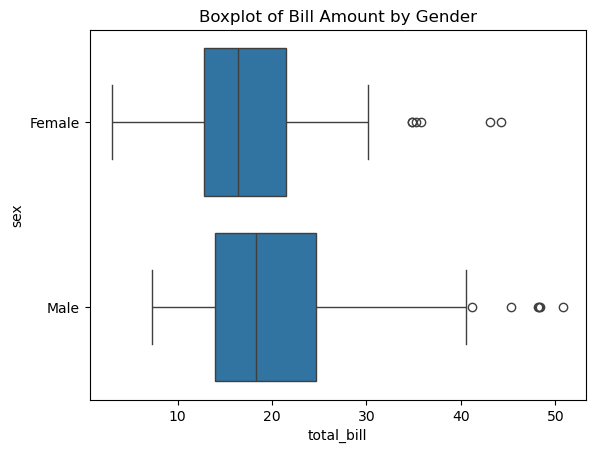

In [20]:
sns.boxplot(x='total_bill', y='sex', data=tips, orient='h')
plt.title("Boxplot of Bill Amount by Gender")
plt.show()


### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [22]:
max_bill_lunch_dinner = tips[(tips['day'].isin(['Sat', 'Sun'])) & (tips['time'].isin(['Lunch', 'Dinner']))].groupby(['day', 'time'])['total_bill'].max()

### 15. Compute the percentage of missing values in the dataset.

In [23]:
missing_values_percentage = tips.isnull().mean() * 100


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [24]:
duplicate_count = tips.duplicated().sum()
tips = tips.drop_duplicates()


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

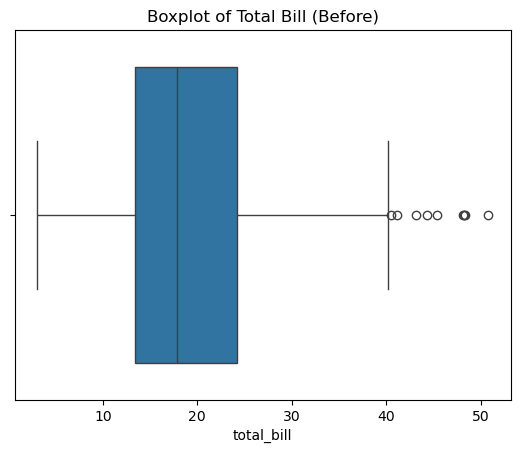

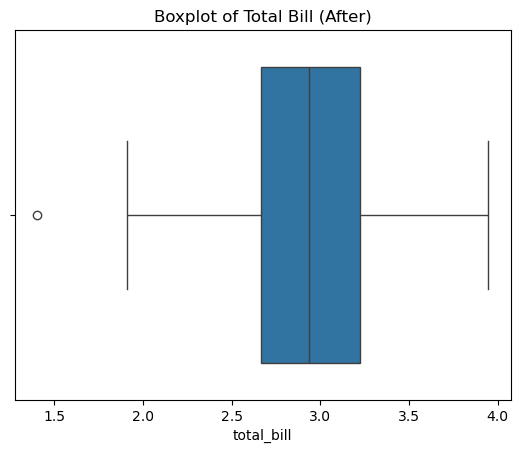

In [25]:
sns.boxplot(x=tips['total_bill'])
plt.title("Boxplot of Total Bill (Before)")
plt.show()

# Log Transformation
tips['total_bill'] = np.log1p(tips['total_bill'])

sns.boxplot(x=tips['total_bill'])
plt.title("Boxplot of Total Bill (After)")
plt.show()


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [26]:
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1
tips = tips[~((tips['tip'] < (Q1 - 1.5 * IQR)) | (tips['tip'] > (Q3 + 1.5 * IQR)))]


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [27]:
le = LabelEncoder()
for col in categorical_cols:
    tips[col] = le.fit_transform(tips[col])

tips.sample(5)


,total_bill,tip,sex,smoker,day,time,size
33,3.076851,2.45,0,0,1,0,4
219,3.438493,3.09,0,1,1,0,4
201,2.620311,2.01,0,1,3,1,2
164,2.918311,3.00,0,1,2,0,2
12,2.798500,1.57,1,0,2,0,2


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [28]:
range_total_bill = tips['total_bill'].max() - tips['total_bill'].min()
tips['total_bill'] = tips['total_bill'] / range_total_bill


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [29]:
tips_df = sns.load_dataset("tips")
for col in categorical_cols:
    tips_df[col] = le.fit_transform(tips_df[col])

X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [30]:
X = tips.drop('tip', axis=1)  # Features (excluding the target variable 'tip')
y = tips['tip']  # Target variable

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()

# Apply scaling to the "total_bill" and "size" columns in the training set
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])

# Apply the same transformation to the test set
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-Squared Value: {r_squared}")


R-Squared Value: 0.40724324981168236


### Happy Learning:)